In [1]:
import warnings
warnings.filterwarnings('ignore')

### Run in collab
<a href="https://colab.research.google.com/github/racousin/rl_introduction/blob/master/notebooks/3_Temporal_Difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install swig build-essential python-dev python3-dev > /dev/null 2>&1
!pip install pygame==2.1.0 > /dev/null 2>&1
!pip install gym==0.23.1 > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install colabgymrender==1.0.2 > /dev/null 2>&1
!pip install imageio==2.4.1 > /dev/null 2>&1
!git clone https://github.com/racousin/rl_introduction.git > /dev/null 2>&1

In [5]:
!git clone https://github.com/racousin/rl_introduction.git > /dev/null 2>&1

In [7]:
from rl_introduction.rl_introduction.tools import Agent, plot_values_lake, policy_evaluation, value_iteration, discount_cumsum, MyRandomAgent, run_experiment_episode_train

# 3_Temporal_Difference

### Objective
Here we present methods to solve the problem of environment and agents when the model is not known.

**Complete the TODO steps! Good luck!**

### Evaluate and train the agent

In [8]:
import numpy as np
import gym
import matplotlib.pyplot as plt
env = gym.make('FrozenLake-v1')

run_experiment_episode_train will be the function used to interact and learn from environment

In [9]:
def run_experiment_episode_train(env, agent, nb_episode, is_train=True):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state = env.reset()
        done = False
        rews = []
        while done is False:
            action = agent.act(state)
            current_state = state
            state, reward, done, info = env.step(action)
            if is_train:
                agent.train(current_state, action, reward, state, done) # agent need a train method
            rews.append(reward)
        rewards[i] = sum(rews)
        print('episode: {} - cum reward {}'.format(i, rewards[i]))
    return rewards

In [10]:
class Example_of_trainable_agent:
    def __init__(self, env):
        self.env = env
        self.policy = np.ones([self.env.observation_space.n, self.env.action_space.n]) / self.env.action_space.n
    def act(self, state):
        action = np.random.choice(np.arange(self.env.action_space.n),p=self.policy[state])
        return action
    def train(self, current_state, action, reward, state, done):
        pass # do something smart to improve the policy

In [11]:
demo_agent = Example_of_trainable_agent(env)
run_experiment_episode_train(env, demo_agent, nb_episode=10, is_train=True)

episode: 0 - cum reward 0.0
episode: 1 - cum reward 0.0
episode: 2 - cum reward 0.0
episode: 3 - cum reward 0.0
episode: 4 - cum reward 0.0
episode: 5 - cum reward 0.0
episode: 6 - cum reward 0.0
episode: 7 - cum reward 0.0
episode: 8 - cum reward 0.0
episode: 9 - cum reward 0.0


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Simplest exploration
Without knowing the model, we improve the policy by interacting with the environment. We start with an arbitrary policy, a major problem is caused by a local maximum due to insufficient exploration. To avoid it, we force the agent to act sometimes in a random way (control by an epsilon).

Until we are not confident of our evaluation of $Q$ we don't know if choising $\pi(s) = \max_a Q_\pi(s,a)$ will bring to a better policy.

It gives us Epsilon-Greedy policy $\pi(s) = \max_a Q_\pi(s,a)$ with probability $1-\epsilon$ any other action with probability $\epsilon$

In [12]:
#TODO: get epsilon greedy policy
def get_epsilon_greedy_policy(Q_s, epsilon, nA):
    return policy_s

In [ ]:
#Done: get epsilon greedy policy
def get_epsilon_greedy_policy(Q_s, epsilon, nA):
    policy_s = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / nA)
    return policy_s

In [13]:
# If we find a way to evalue the action-value function Q. We are ready to train our agent
def train(self, current_state, action, reward, state, done):
    self.q = evalution_of_Q()
    for state in range(env.observation_space.n): # update policy
        self.policy[state] = get_epsilon_greedy_policy(self.q[state], self.epsilon, env.action_space.n)
    def act(self, state):
        action = np.random.choice(np.arange(self.env.action_space.n),p=self.policy[state])
        return action

# Usefull tools
Many times, it will be necessary to calculate the discount return $G_t = \sum_{k=0}^T\gamma^k R_{t+k+1}$. For that, we use optimized discount_cumsum function. Example

In [14]:
episode_reward = [0,0,0,1,0,0,0,-.3,0,1,1,0,10]
gamma = 0.99
discount_cumsum(episode_reward, gamma)

array([11.37242744, 11.48730044, 11.60333378, 11.72053917, 10.82882744,
       10.93820954, 11.0486965 , 11.1602995 , 11.5760601 , 11.69299   ,
       10.801     ,  9.9       , 10.        ])

In many cases, we will need to compute the disount rewards through multiple episodes:

### TODO 1): compute G along episodes

In [15]:
#TODO: compute G along episodes for a random agent (action = env.action_space.sample())
def get_G(env, gamma=0.99, nb_episode=500):
    return discount_returns
# It should return the list of discounted return through multiple episodes.
# Example:
# gamma=1
# nb_episode=2
# episode_reward1 = [1,2,3]
# episode_reward2 = [-1,0,1,4]
# return = [6., 5., 3., 4., 5., 5., 4.]

In [17]:
#Done: compute G along episodes
def get_G(env, gamma=0.99, nb_episode=50):
    discount_returns = []
    for i in range(nb_episode):
        rewards = []
        state = env.reset()
        done = False
        while done is False:
            action = env.action_space.sample()
            state, reward, done, info = env.step(action)
            rewards.append(reward)
        discount_returns.append(discount_cumsum(rewards, gamma))
    return np.hstack(discount_returns)

In [18]:
res = get_G(env)
res

array([0.        , 0.        , 0.        , 0.92274469, 0.93206535,
       0.94148015, 0.95099005, 0.96059601, 0.970299  , 0.9801    ,
       0.99      , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

And to compute the trajectories $(S,A,R,G)_\pi$:

### TODO 2): compute trajectory along episode

In [ ]:
#TODO: compute trajectory along episode for a random agent (action = env.action_space.sample())
def get_trajectories(env, gamma=0.99, nb_episode=50):
    return trajectories
# It should return the list of S_t, A_t, R_{t+1}, G_t through multiple episodes.
# Example:
# gamma=1
# nb_episode=2
# episode_reward1 = [1,2,3]
# episode_state1 = ['s1', 's2', 's1'] 
# episode_action1 = ['a1', 'a2', 'a1'] 
# episode_reward2 = [-1,0,1,4]
# episode_state2 = ['s1', 's2', 's3', 's2'] 
# episode_action2 = ['a1', 'a2', 'a3', 'a3'] 
# return = [['s1', 'a1', 1, 6.],
#           ['s2', 'a2', 2, 5.],
#           ['s1', 'a1', 3, 3.],
#           ['s1', 'a1', -1, 4.],
#           ['s2',' a2', 0, 5.],
#           ['s3', 'a3', 1, 5.],
#           ['s2', 'a3', 4, 4.]]

In [ ]:
#Done: compute trajectory alon episode
def get_trajectories(env, gamma=0.99, nb_episode=50):
    trajectories = []
    for i in range(nb_episode):
        episode = []
        state = env.reset()
        done = False
        while done is False:
            action = env.action_space.sample()
            current_state = state
            state, reward, done, info = env.step(action)
            episode.append(np.array([current_state, action, reward]))  #S_t, A_t, R_{t+1}
        episode = np.asarray(episode)
        discount_return = discount_cumsum(episode[:,2], gamma)
        trajectories.append(np.c_[discount_return.reshape(-1,1), episode]) #S_t, A_t, R_{t+1}, G_t
    return np.vstack(trajectories)

In [ ]:
res = get_trajectories(env)
res.shape
#print('states' : res[:,0])
#print('actions' : res[:,1])
#print('rewards' : res[:,2])
#print('cumulative discounted rewards' : res[:,3])

(419, 4)

In [ ]:
res

array([[0., 0., 2., 0.],
       [0., 4., 3., 0.],
       [0., 4., 1., 0.],
       ...,
       [0., 0., 2., 0.],
       [0., 0., 2., 0.],
       [0., 4., 3., 0.]])

# Monte-Carlo Methods

Now, considering an environment without knowing its transition model, we want to build a smart agent, a free model based agent.
The naive approach is to estimate the Q function using monte-carlo estimation.
As we know:
\begin{aligned}
V_{\pi}(s) &= \mathbb{E}[G_t \vert S_t = s] = \frac{1}{P(S_t=s)}E[G_t \mathbb{1}_{S_t=s}] \\
Q_{\pi}(s, a) &= \mathbb{E}_{\pi}[G_t \vert S_t = s, A_t = a]
\end{aligned}
We compute the empirical return $G_t = \sum_{k=0}^{T-t-1} \gamma^k R_{t+k+1}$, following policy $\pi$.
From law of large numbers the estimators:
\begin{aligned}
V_{\pi}(s) &\simeq \frac{\sum_{t=1}^T \mathbb{1}[S_t = s] G_t}{\sum_{t=1}^T \mathbb{1}[S_t = s]}\\
Q(s, a) &\simeq \frac{\sum_{t=1}^T \mathbb{1}[S_t = s, A_t = a] G_t}{\sum_{t=1}^T \mathbb{1}[S_t = s, A_t = a]}
\end{aligned}

Remember Incremental mean:
\begin{aligned}
\mu_K &= \frac{1}{K}\sum_{j=1}^K X_j\\
\mu_K &= \frac{1}{K}[X_K + \sum_{j=1}^{K-1} X_j]\\
\mu_K &= \frac{1}{K}[X_K + (K-1)\mu_{K-1}]\\
\mu_K &= \mu_{K-1} + \frac{1}{K}(X_K -\mu_{K-1})\\
\end{aligned}
As well:
\begin{aligned}
\mu_K &= \mu_{K-p} + \frac{1}{K}(\sum_{K-p}^K X_k - p\mu_{K-p})\\
\end{aligned}
We do the same to update incrementally at each episode the empirical $V$. For each state $S_t$ with return $G_t$:
\begin{aligned}
V(S_t) &\leftarrow V(S_t) + \frac{1}{N_{\text{total}}(S_t)}(G_t - N_{\text{trajectory}}(S_t)V(S_t))\\
\end{aligned}

### TODO 3): complete policy MC evaluation step

In [19]:
#TODO: complete policy MC evaluation step
# It should evaluate and return the value function for all state for an agent
# initialize value function
# 1) Compute an episode (cumulative reward, N_{total}, N_{trajectory})
# 2) For each state update the value function using incremental mean
# 3) go back to 1
def policy_MC_evaluation(env, agent, gamma=1, nb_episode=5000):
    return V

In [20]:
#Done: complete policy MC evaluation step
def policy_MC_evaluation(env, agent, gamma=1, nb_episode=5000):
    V = np.zeros(env.observation_space.n) 
    N_total = np.zeros(env.observation_space.n)
    for i in range(nb_episode):
        episode = []
        N_trajectory = np.zeros(env.observation_space.n)
        state = env.reset()
        done = False
        while done is False:
            action = agent.act(state)
            current_state = state
            state, reward, done, info = env.step(action)
            episode.append(np.array([current_state, action, reward]))
            N_total[current_state] += 1
            N_trajectory[current_state] += 1
        episode = np.asarray(episode)
        discount_empirical_return = discount_cumsum(episode[:,2], gamma)
        for state, count in enumerate(N_total):
            if count >0 :
                V[state] += (discount_empirical_return[episode[:,0] == state].sum() - N_trajectory[state] * V[state]) / count
    return V

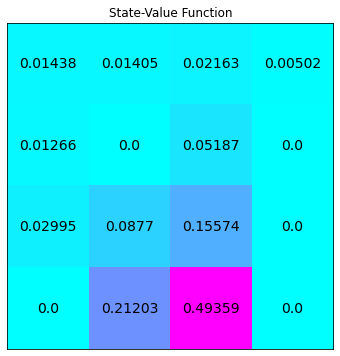

In [21]:
rand_agent = MyRandomAgent(env)
V= policy_MC_evaluation(env, rand_agent)
plot_values_lake(V)

In [ ]:
V.sum()

0.8251166557737017

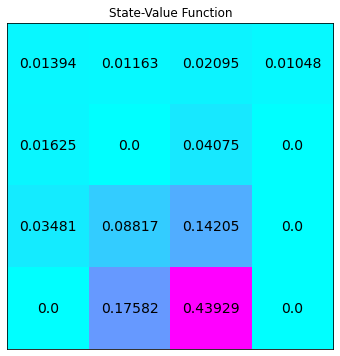

In [ ]:
# In reality, here we know the model, we use it to control our results
rand_agent = MyRandomAgent(env)
V = policy_evaluation(env, rand_agent.policy) #see II) dynamic-programming
plot_values_lake(V)

In [ ]:
V.sum()

0.9941411498416601

In the same way, we estimate the Q function. 

For Q evaluation
\begin{aligned}
Q(A_t, S_t) &\leftarrow Q(A_t, S_t) + \frac{1}{N_{\text{total}}(A_t, S_t)}(G_t - N_{\text{trajectory}}(A_t, S_t)Q(A_t, S_t))\\
\end{aligned}

And we train an agent, improving its policy by acting greddy.
$\forall s$ $\pi'(.|s) = \arg\max_a Q_\pi(s,a)$.

### Train Monte-Carlo agent

### TODO 4): complete policy MC algo

In [22]:
### TODO 4): complete policy MC algo
class MyMCAgent(Agent):
    def __init__(self, env, gamma = .99, epsilon = .1):
        super().__init__(env, gamma, epsilon)
        self.q = np.ones([self.env.observation_space.n, self.env.action_space.n])
        # add the value you need (episode, N_{total}, N_{trajectory})
    def train(self, current_state, action, reward, next_state, done):
        # collect trajectories
        # update N_{total}, N_{trajectory}
        if done is True: # we train the agent at every end of episode
        # evaluate Q
            for state in range(env.observation_space.n): # update policy
                self.policy[state] = get_epsilon_greedy_policy(self.q[state], self.epsilon, env.action_space.n)

In [23]:
### Done 4): complete policy MC algo
class MyMCAgent(Agent):
    def __init__(self, env, gamma = .99, epsilon = .1):
        super().__init__(env, gamma, epsilon)
        self.q = np.ones([self.env.observation_space.n, self.env.action_space.n])
        self.count_state_actions = np.zeros((self.env.observation_space.n, self.env.action_space.n))
        self.count_state_actions_by_update = np.zeros((self.env.observation_space.n, self.env.action_space.n))
        self.episode = []
    def train(self, current_state, action, reward, next_state, done):
        self.episode.append(np.array([current_state, action, reward])) # collect trajectories
        self.count_state_actions[current_state, action] += 1
        self.count_state_actions_by_update[current_state, action] += 1
        if done is True: # we train the agent at every end of episode
            episode = np.asarray(self.episode)
            discount_empirical_return = discount_cumsum(episode[:,2], self.gamma)
            for state in range(len(self.count_state_actions)): # evaluate Q
                for action, count in enumerate(self.count_state_actions[state]):
                    if count > 0 : # evaluate Q
                        self.q[state,action] += (discount_empirical_return[(episode[:,0] == state) & (episode[:,1] == action)].sum() - self.count_state_actions_by_update[state, action] * self.q[state,action]) / count
            self.count_state_actions_by_update = np.zeros((self.env.observation_space.n, self.env.action_space.n))
            self.episode = []
            for state in range(env.observation_space.n): # update policy
                self.policy[state] = get_epsilon_greedy_policy(self.q[state], self.epsilon, env.action_space.n)

episode: 0 - cum reward 0.0
episode: 1 - cum reward 0.0
episode: 2 - cum reward 0.0
episode: 3 - cum reward 0.0
episode: 4 - cum reward 0.0
episode: 5 - cum reward 0.0
episode: 6 - cum reward 0.0
episode: 7 - cum reward 0.0
episode: 8 - cum reward 0.0
episode: 9 - cum reward 0.0
episode: 10 - cum reward 0.0
episode: 11 - cum reward 0.0
episode: 12 - cum reward 0.0
episode: 13 - cum reward 0.0
episode: 14 - cum reward 0.0
episode: 15 - cum reward 0.0
episode: 16 - cum reward 0.0
episode: 17 - cum reward 0.0
episode: 18 - cum reward 0.0
episode: 19 - cum reward 0.0
episode: 20 - cum reward 0.0
episode: 21 - cum reward 0.0
episode: 22 - cum reward 0.0
episode: 23 - cum reward 0.0
episode: 24 - cum reward 0.0
episode: 25 - cum reward 0.0
episode: 26 - cum reward 0.0
episode: 27 - cum reward 0.0
episode: 28 - cum reward 0.0
episode: 29 - cum reward 0.0
episode: 30 - cum reward 0.0
episode: 31 - cum reward 0.0
episode: 32 - cum reward 0.0
episode: 33 - cum reward 0.0
episode: 34 - cum reward

Text(0.5, 1.0, 'cumulative reward per episode - mc_agent')

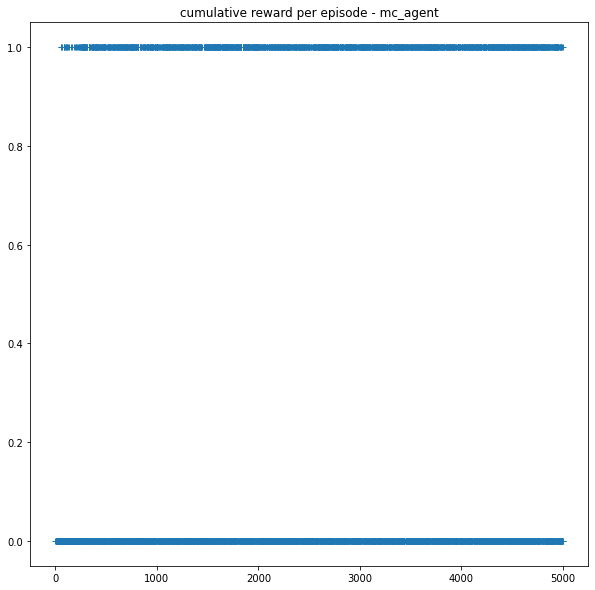

In [24]:
mc_agent = MyMCAgent(env)
rewards = run_experiment_episode_train(env, mc_agent, 5000)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(rewards,'+')
ax.set_title('cumulative reward per episode - mc_agent')

In [25]:
mc_agent.policy

array([[0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.025, 0.925],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025]])

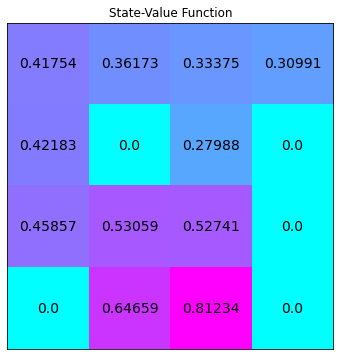

In [26]:
V = policy_evaluation(env, mc_agent.policy)
plot_values_lake(V)

In [27]:
V.sum()

5.100116629064201

# Temporal-Difference-Learning (Monte-Carlo bootstrap) 

Using monte-carlo, we update $V(S_t)$ in that way

\begin{aligned}
V(S_t) &\leftarrow V(S_t) + \alpha (G_t - V(S_t)) \\
\end{aligned}
Using bellman equation $\mathbb{E}[G_t|S_t=s] = \mathbb{E}[R_{t+1} + \gamma V(S_{t+1})|S_t=s]$, That pushes new estimators/update

TD target $= R_{t+1} + \gamma V(S_{t+1}$)

TD error $=$ target $- V(S_t)$

update:  

\begin{aligned}
V(S_t) &\leftarrow V(S_t) + \alpha (R_{t+1} + \gamma V(S_{t+1}) - V(S_t))
\end{aligned}

### TODO 5): complete policy td evaluation step

In [ ]:
#TODO: complete policy td evaluation step
def policy_td_evaluation(env, agent, gamma=1, nb_episode=5000, alpha = .01):
    V = np.zeros(env.observation_space.n)
    for i in range(nb_episode):
        state = env.reset()
        done = False
        while done is False:
            action = agent.act(state)
            current_state = state
            state, reward, done, info = env.step(action)
            target = None #complete here reward + gamma * V[state]
            td_error = None #complete here target - V[current_state]
            V[current_state] += None #complete here
    return V

In [28]:
#Done: complete policy td evaluation step
def policy_td_evaluation(env, agent, gamma=1, nb_episode=5000, alpha = .01):
    V = np.zeros(env.observation_space.n)
    for i in range(nb_episode):
        state = env.reset()
        done = False
        while done is False:
            action = agent.act(state)
            current_state = state
            state, reward, done, info = env.step(action)
            target = reward + gamma * V[state]
            td_error = target - V[current_state]
            V[current_state] += td_error * alpha
    return V

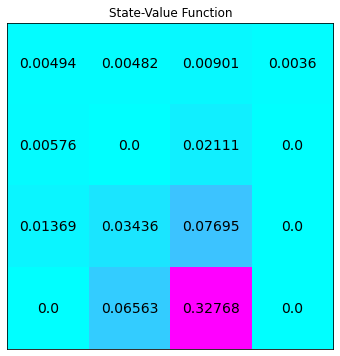

In [29]:
rand_agent = MyRandomAgent(env)
V = policy_td_evaluation(env, rand_agent)
plot_values_lake(V)

### SARSA

Same principle for q function update using Temporal difference$Q(S_t,A_t) \leftarrow Q(S_t,A_t)+ \alpha(R_{t+1}+\gamma Q(S_{t+1},A_{t+1})−Q(S_t,A_t))$.

### TODO 5): complete SARSA agent

In [ ]:
### TODO 5): complete SARSA agent
class MySarsaAgent(Agent):
    def __init__(self, env, gamma = .99, epsilon = .1, alpha = .01):
        super().__init__(env, gamma, epsilon)
        self.alpha = alpha
        self.q = np.ones([self.env.observation_space.n, self.env.action_space.n]) / self.env.action_space.n       
    def train(self, current_state, action, reward, next_state, done):
        # TRAIN SARSA
        for state in range(env.observation_space.n):
            self.policy[state] = get_epsilon_greedy_policy(self.q[state], self.epsilon, env.action_space.n)

In [ ]:
### Done 5): complete SARSA agent
class MySarsaAgent(Agent):
    def __init__(self, env, gamma = .99, epsilon = .1, alpha = .01):
        super().__init__(env, gamma, epsilon)
        self.alpha = alpha
        self.q = np.ones([self.env.observation_space.n, self.env.action_space.n]) / self.env.action_space.n
        self.sarsa = [None, None, None, None, None] #[s,a,r,s,a]
        self.tmp_reward = None
    def qsa_update(self, done):
        if done:
            target = self.sarsa[2]
        else:
            target = self.sarsa[2] + self.gamma * self.q[self.sarsa[-2], self.sarsa[-1]] 
        td_error = target - self.q[self.sarsa[0], self.sarsa[1]]
        self.q[self.sarsa[0], self.sarsa[1]]  += self.alpha * td_error
        
    def train(self, current_state, action, reward, next_state, done):
        self.sarsa[0] = self.sarsa[-2]
        self.sarsa[1] = self.sarsa[-1]
        self.sarsa[2] = self.tmp_reward
        self.sarsa[3] = current_state
        self.sarsa[4] = action
        self.tmp_reward = reward
        if self.sarsa[0] is None:
            pass
        else:
            self.qsa_update(done)
        for state in range(env.observation_space.n):
            self.policy[state] = get_epsilon_greedy_policy(self.q[state], self.epsilon, env.action_space.n)

episode: 0 - cum reward 0.0
episode: 1 - cum reward 0.0
episode: 2 - cum reward 0.0
episode: 3 - cum reward 0.0
episode: 4 - cum reward 0.0
episode: 5 - cum reward 0.0
episode: 6 - cum reward 0.0
episode: 7 - cum reward 0.0
episode: 8 - cum reward 0.0
episode: 9 - cum reward 0.0
episode: 10 - cum reward 0.0
episode: 11 - cum reward 0.0
episode: 12 - cum reward 0.0
episode: 13 - cum reward 0.0
episode: 14 - cum reward 0.0
episode: 15 - cum reward 0.0
episode: 16 - cum reward 0.0
episode: 17 - cum reward 0.0
episode: 18 - cum reward 0.0
episode: 19 - cum reward 0.0
episode: 20 - cum reward 0.0
episode: 21 - cum reward 0.0
episode: 22 - cum reward 0.0
episode: 23 - cum reward 0.0
episode: 24 - cum reward 0.0
episode: 25 - cum reward 0.0
episode: 26 - cum reward 0.0
episode: 27 - cum reward 0.0
episode: 28 - cum reward 0.0
episode: 29 - cum reward 0.0
episode: 30 - cum reward 0.0
episode: 31 - cum reward 0.0
episode: 32 - cum reward 0.0
episode: 33 - cum reward 0.0
episode: 34 - cum reward

episode: 339 - cum reward 0.0
episode: 340 - cum reward 0.0
episode: 341 - cum reward 0.0
episode: 342 - cum reward 0.0
episode: 343 - cum reward 0.0
episode: 344 - cum reward 0.0
episode: 345 - cum reward 0.0
episode: 346 - cum reward 0.0
episode: 347 - cum reward 0.0
episode: 348 - cum reward 0.0
episode: 349 - cum reward 0.0
episode: 350 - cum reward 0.0
episode: 351 - cum reward 0.0
episode: 352 - cum reward 0.0
episode: 353 - cum reward 0.0
episode: 354 - cum reward 0.0
episode: 355 - cum reward 0.0
episode: 356 - cum reward 0.0
episode: 357 - cum reward 0.0
episode: 358 - cum reward 0.0
episode: 359 - cum reward 0.0
episode: 360 - cum reward 0.0
episode: 361 - cum reward 0.0
episode: 362 - cum reward 0.0
episode: 363 - cum reward 0.0
episode: 364 - cum reward 0.0
episode: 365 - cum reward 0.0
episode: 366 - cum reward 0.0
episode: 367 - cum reward 0.0
episode: 368 - cum reward 0.0
episode: 369 - cum reward 0.0
episode: 370 - cum reward 0.0
episode: 371 - cum reward 0.0
episode: 3

episode: 674 - cum reward 0.0
episode: 675 - cum reward 0.0
episode: 676 - cum reward 0.0
episode: 677 - cum reward 0.0
episode: 678 - cum reward 0.0
episode: 679 - cum reward 0.0
episode: 680 - cum reward 0.0
episode: 681 - cum reward 0.0
episode: 682 - cum reward 0.0
episode: 683 - cum reward 0.0
episode: 684 - cum reward 0.0
episode: 685 - cum reward 0.0
episode: 686 - cum reward 0.0
episode: 687 - cum reward 0.0
episode: 688 - cum reward 0.0
episode: 689 - cum reward 0.0
episode: 690 - cum reward 0.0
episode: 691 - cum reward 0.0
episode: 692 - cum reward 0.0
episode: 693 - cum reward 0.0
episode: 694 - cum reward 0.0
episode: 695 - cum reward 0.0
episode: 696 - cum reward 0.0
episode: 697 - cum reward 0.0
episode: 698 - cum reward 0.0
episode: 699 - cum reward 0.0
episode: 700 - cum reward 0.0
episode: 701 - cum reward 0.0
episode: 702 - cum reward 0.0
episode: 703 - cum reward 0.0
episode: 704 - cum reward 0.0
episode: 705 - cum reward 0.0
episode: 706 - cum reward 0.0
episode: 7

episode: 974 - cum reward 0.0
episode: 975 - cum reward 0.0
episode: 976 - cum reward 0.0
episode: 977 - cum reward 0.0
episode: 978 - cum reward 0.0
episode: 979 - cum reward 0.0
episode: 980 - cum reward 0.0
episode: 981 - cum reward 0.0
episode: 982 - cum reward 0.0
episode: 983 - cum reward 1.0
episode: 984 - cum reward 0.0
episode: 985 - cum reward 0.0
episode: 986 - cum reward 1.0
episode: 987 - cum reward 0.0
episode: 988 - cum reward 0.0
episode: 989 - cum reward 0.0
episode: 990 - cum reward 0.0
episode: 991 - cum reward 0.0
episode: 992 - cum reward 0.0
episode: 993 - cum reward 0.0
episode: 994 - cum reward 0.0
episode: 995 - cum reward 0.0
episode: 996 - cum reward 0.0
episode: 997 - cum reward 0.0
episode: 998 - cum reward 0.0
episode: 999 - cum reward 0.0
episode: 1000 - cum reward 0.0
episode: 1001 - cum reward 0.0
episode: 1002 - cum reward 0.0
episode: 1003 - cum reward 0.0
episode: 1004 - cum reward 0.0
episode: 1005 - cum reward 0.0
episode: 1006 - cum reward 0.0
epi

episode: 1297 - cum reward 0.0
episode: 1298 - cum reward 0.0
episode: 1299 - cum reward 0.0
episode: 1300 - cum reward 0.0
episode: 1301 - cum reward 0.0
episode: 1302 - cum reward 0.0
episode: 1303 - cum reward 0.0
episode: 1304 - cum reward 0.0
episode: 1305 - cum reward 0.0
episode: 1306 - cum reward 0.0
episode: 1307 - cum reward 0.0
episode: 1308 - cum reward 0.0
episode: 1309 - cum reward 0.0
episode: 1310 - cum reward 0.0
episode: 1311 - cum reward 0.0
episode: 1312 - cum reward 0.0
episode: 1313 - cum reward 0.0
episode: 1314 - cum reward 0.0
episode: 1315 - cum reward 0.0
episode: 1316 - cum reward 0.0
episode: 1317 - cum reward 0.0
episode: 1318 - cum reward 0.0
episode: 1319 - cum reward 0.0
episode: 1320 - cum reward 0.0
episode: 1321 - cum reward 0.0
episode: 1322 - cum reward 0.0
episode: 1323 - cum reward 0.0
episode: 1324 - cum reward 0.0
episode: 1325 - cum reward 0.0
episode: 1326 - cum reward 0.0
episode: 1327 - cum reward 0.0
episode: 1328 - cum reward 0.0
episode:

episode: 1622 - cum reward 0.0
episode: 1623 - cum reward 0.0
episode: 1624 - cum reward 0.0
episode: 1625 - cum reward 0.0
episode: 1626 - cum reward 0.0
episode: 1627 - cum reward 0.0
episode: 1628 - cum reward 0.0
episode: 1629 - cum reward 0.0
episode: 1630 - cum reward 0.0
episode: 1631 - cum reward 0.0
episode: 1632 - cum reward 0.0
episode: 1633 - cum reward 0.0
episode: 1634 - cum reward 0.0
episode: 1635 - cum reward 0.0
episode: 1636 - cum reward 0.0
episode: 1637 - cum reward 0.0
episode: 1638 - cum reward 0.0
episode: 1639 - cum reward 0.0
episode: 1640 - cum reward 0.0
episode: 1641 - cum reward 0.0
episode: 1642 - cum reward 0.0
episode: 1643 - cum reward 0.0
episode: 1644 - cum reward 0.0
episode: 1645 - cum reward 0.0
episode: 1646 - cum reward 0.0
episode: 1647 - cum reward 0.0
episode: 1648 - cum reward 0.0
episode: 1649 - cum reward 0.0
episode: 1650 - cum reward 0.0
episode: 1651 - cum reward 0.0
episode: 1652 - cum reward 0.0
episode: 1653 - cum reward 0.0
episode:

episode: 1894 - cum reward 0.0
episode: 1895 - cum reward 0.0
episode: 1896 - cum reward 0.0
episode: 1897 - cum reward 0.0
episode: 1898 - cum reward 0.0
episode: 1899 - cum reward 0.0
episode: 1900 - cum reward 0.0
episode: 1901 - cum reward 0.0
episode: 1902 - cum reward 0.0
episode: 1903 - cum reward 0.0
episode: 1904 - cum reward 0.0
episode: 1905 - cum reward 0.0
episode: 1906 - cum reward 0.0
episode: 1907 - cum reward 0.0
episode: 1908 - cum reward 0.0
episode: 1909 - cum reward 0.0
episode: 1910 - cum reward 0.0
episode: 1911 - cum reward 0.0
episode: 1912 - cum reward 0.0
episode: 1913 - cum reward 0.0
episode: 1914 - cum reward 0.0
episode: 1915 - cum reward 0.0
episode: 1916 - cum reward 0.0
episode: 1917 - cum reward 0.0
episode: 1918 - cum reward 0.0
episode: 1919 - cum reward 0.0
episode: 1920 - cum reward 0.0
episode: 1921 - cum reward 0.0
episode: 1922 - cum reward 0.0
episode: 1923 - cum reward 0.0
episode: 1924 - cum reward 0.0
episode: 1925 - cum reward 0.0
episode:

episode: 2181 - cum reward 0.0
episode: 2182 - cum reward 0.0
episode: 2183 - cum reward 0.0
episode: 2184 - cum reward 0.0
episode: 2185 - cum reward 0.0
episode: 2186 - cum reward 0.0
episode: 2187 - cum reward 0.0
episode: 2188 - cum reward 0.0
episode: 2189 - cum reward 0.0
episode: 2190 - cum reward 0.0
episode: 2191 - cum reward 1.0
episode: 2192 - cum reward 0.0
episode: 2193 - cum reward 0.0
episode: 2194 - cum reward 0.0
episode: 2195 - cum reward 1.0
episode: 2196 - cum reward 0.0
episode: 2197 - cum reward 0.0
episode: 2198 - cum reward 0.0
episode: 2199 - cum reward 0.0
episode: 2200 - cum reward 0.0
episode: 2201 - cum reward 0.0
episode: 2202 - cum reward 0.0
episode: 2203 - cum reward 0.0
episode: 2204 - cum reward 0.0
episode: 2205 - cum reward 0.0
episode: 2206 - cum reward 0.0
episode: 2207 - cum reward 0.0
episode: 2208 - cum reward 0.0
episode: 2209 - cum reward 0.0
episode: 2210 - cum reward 0.0
episode: 2211 - cum reward 0.0
episode: 2212 - cum reward 0.0
episode:

episode: 2497 - cum reward 0.0
episode: 2498 - cum reward 0.0
episode: 2499 - cum reward 0.0
episode: 2500 - cum reward 0.0
episode: 2501 - cum reward 0.0
episode: 2502 - cum reward 0.0
episode: 2503 - cum reward 0.0
episode: 2504 - cum reward 0.0
episode: 2505 - cum reward 0.0
episode: 2506 - cum reward 0.0
episode: 2507 - cum reward 0.0
episode: 2508 - cum reward 0.0
episode: 2509 - cum reward 0.0
episode: 2510 - cum reward 0.0
episode: 2511 - cum reward 0.0
episode: 2512 - cum reward 0.0
episode: 2513 - cum reward 0.0
episode: 2514 - cum reward 0.0
episode: 2515 - cum reward 0.0
episode: 2516 - cum reward 0.0
episode: 2517 - cum reward 0.0
episode: 2518 - cum reward 0.0
episode: 2519 - cum reward 0.0
episode: 2520 - cum reward 0.0
episode: 2521 - cum reward 0.0
episode: 2522 - cum reward 0.0
episode: 2523 - cum reward 0.0
episode: 2524 - cum reward 0.0
episode: 2525 - cum reward 0.0
episode: 2526 - cum reward 0.0
episode: 2527 - cum reward 0.0
episode: 2528 - cum reward 0.0
episode:

episode: 2822 - cum reward 0.0
episode: 2823 - cum reward 0.0
episode: 2824 - cum reward 0.0
episode: 2825 - cum reward 0.0
episode: 2826 - cum reward 0.0
episode: 2827 - cum reward 0.0
episode: 2828 - cum reward 0.0
episode: 2829 - cum reward 0.0
episode: 2830 - cum reward 0.0
episode: 2831 - cum reward 0.0
episode: 2832 - cum reward 0.0
episode: 2833 - cum reward 0.0
episode: 2834 - cum reward 0.0
episode: 2835 - cum reward 0.0
episode: 2836 - cum reward 0.0
episode: 2837 - cum reward 0.0
episode: 2838 - cum reward 0.0
episode: 2839 - cum reward 0.0
episode: 2840 - cum reward 0.0
episode: 2841 - cum reward 0.0
episode: 2842 - cum reward 0.0
episode: 2843 - cum reward 0.0
episode: 2844 - cum reward 0.0
episode: 2845 - cum reward 0.0
episode: 2846 - cum reward 0.0
episode: 2847 - cum reward 0.0
episode: 2848 - cum reward 0.0
episode: 2849 - cum reward 0.0
episode: 2850 - cum reward 0.0
episode: 2851 - cum reward 0.0
episode: 2852 - cum reward 0.0
episode: 2853 - cum reward 0.0
episode:

episode: 3185 - cum reward 0.0
episode: 3186 - cum reward 0.0
episode: 3187 - cum reward 0.0
episode: 3188 - cum reward 0.0
episode: 3189 - cum reward 0.0
episode: 3190 - cum reward 0.0
episode: 3191 - cum reward 0.0
episode: 3192 - cum reward 0.0
episode: 3193 - cum reward 0.0
episode: 3194 - cum reward 0.0
episode: 3195 - cum reward 0.0
episode: 3196 - cum reward 0.0
episode: 3197 - cum reward 0.0
episode: 3198 - cum reward 0.0
episode: 3199 - cum reward 0.0
episode: 3200 - cum reward 0.0
episode: 3201 - cum reward 0.0
episode: 3202 - cum reward 0.0
episode: 3203 - cum reward 0.0
episode: 3204 - cum reward 0.0
episode: 3205 - cum reward 0.0
episode: 3206 - cum reward 0.0
episode: 3207 - cum reward 0.0
episode: 3208 - cum reward 0.0
episode: 3209 - cum reward 0.0
episode: 3210 - cum reward 0.0
episode: 3211 - cum reward 0.0
episode: 3212 - cum reward 1.0
episode: 3213 - cum reward 0.0
episode: 3214 - cum reward 0.0
episode: 3215 - cum reward 0.0
episode: 3216 - cum reward 0.0
episode:

episode: 3515 - cum reward 0.0
episode: 3516 - cum reward 0.0
episode: 3517 - cum reward 0.0
episode: 3518 - cum reward 0.0
episode: 3519 - cum reward 0.0
episode: 3520 - cum reward 0.0
episode: 3521 - cum reward 0.0
episode: 3522 - cum reward 0.0
episode: 3523 - cum reward 0.0
episode: 3524 - cum reward 0.0
episode: 3525 - cum reward 0.0
episode: 3526 - cum reward 0.0
episode: 3527 - cum reward 0.0
episode: 3528 - cum reward 0.0
episode: 3529 - cum reward 0.0
episode: 3530 - cum reward 0.0
episode: 3531 - cum reward 0.0
episode: 3532 - cum reward 0.0
episode: 3533 - cum reward 0.0
episode: 3534 - cum reward 0.0
episode: 3535 - cum reward 0.0
episode: 3536 - cum reward 0.0
episode: 3537 - cum reward 0.0
episode: 3538 - cum reward 0.0
episode: 3539 - cum reward 0.0
episode: 3540 - cum reward 0.0
episode: 3541 - cum reward 0.0
episode: 3542 - cum reward 0.0
episode: 3543 - cum reward 0.0
episode: 3544 - cum reward 0.0
episode: 3545 - cum reward 0.0
episode: 3546 - cum reward 0.0
episode:

episode: 3857 - cum reward 0.0
episode: 3858 - cum reward 0.0
episode: 3859 - cum reward 0.0
episode: 3860 - cum reward 0.0
episode: 3861 - cum reward 0.0
episode: 3862 - cum reward 0.0
episode: 3863 - cum reward 0.0
episode: 3864 - cum reward 0.0
episode: 3865 - cum reward 0.0
episode: 3866 - cum reward 0.0
episode: 3867 - cum reward 0.0
episode: 3868 - cum reward 0.0
episode: 3869 - cum reward 0.0
episode: 3870 - cum reward 0.0
episode: 3871 - cum reward 0.0
episode: 3872 - cum reward 0.0
episode: 3873 - cum reward 0.0
episode: 3874 - cum reward 0.0
episode: 3875 - cum reward 0.0
episode: 3876 - cum reward 1.0
episode: 3877 - cum reward 1.0
episode: 3878 - cum reward 1.0
episode: 3879 - cum reward 0.0
episode: 3880 - cum reward 0.0
episode: 3881 - cum reward 0.0
episode: 3882 - cum reward 0.0
episode: 3883 - cum reward 0.0
episode: 3884 - cum reward 0.0
episode: 3885 - cum reward 0.0
episode: 3886 - cum reward 0.0
episode: 3887 - cum reward 0.0
episode: 3888 - cum reward 0.0
episode:

episode: 4150 - cum reward 0.0
episode: 4151 - cum reward 0.0
episode: 4152 - cum reward 0.0
episode: 4153 - cum reward 0.0
episode: 4154 - cum reward 0.0
episode: 4155 - cum reward 0.0
episode: 4156 - cum reward 0.0
episode: 4157 - cum reward 0.0
episode: 4158 - cum reward 0.0
episode: 4159 - cum reward 0.0
episode: 4160 - cum reward 0.0
episode: 4161 - cum reward 0.0
episode: 4162 - cum reward 0.0
episode: 4163 - cum reward 0.0
episode: 4164 - cum reward 0.0
episode: 4165 - cum reward 0.0
episode: 4166 - cum reward 1.0
episode: 4167 - cum reward 0.0
episode: 4168 - cum reward 0.0
episode: 4169 - cum reward 0.0
episode: 4170 - cum reward 0.0
episode: 4171 - cum reward 0.0
episode: 4172 - cum reward 0.0
episode: 4173 - cum reward 0.0
episode: 4174 - cum reward 0.0
episode: 4175 - cum reward 0.0
episode: 4176 - cum reward 0.0
episode: 4177 - cum reward 1.0
episode: 4178 - cum reward 0.0
episode: 4179 - cum reward 0.0
episode: 4180 - cum reward 0.0
episode: 4181 - cum reward 0.0
episode:

episode: 4421 - cum reward 0.0
episode: 4422 - cum reward 0.0
episode: 4423 - cum reward 0.0
episode: 4424 - cum reward 0.0
episode: 4425 - cum reward 1.0
episode: 4426 - cum reward 0.0
episode: 4427 - cum reward 0.0
episode: 4428 - cum reward 1.0
episode: 4429 - cum reward 1.0
episode: 4430 - cum reward 0.0
episode: 4431 - cum reward 0.0
episode: 4432 - cum reward 0.0
episode: 4433 - cum reward 1.0
episode: 4434 - cum reward 0.0
episode: 4435 - cum reward 0.0
episode: 4436 - cum reward 0.0
episode: 4437 - cum reward 0.0
episode: 4438 - cum reward 0.0
episode: 4439 - cum reward 0.0
episode: 4440 - cum reward 0.0
episode: 4441 - cum reward 0.0
episode: 4442 - cum reward 0.0
episode: 4443 - cum reward 1.0
episode: 4444 - cum reward 0.0
episode: 4445 - cum reward 0.0
episode: 4446 - cum reward 1.0
episode: 4447 - cum reward 1.0
episode: 4448 - cum reward 1.0
episode: 4449 - cum reward 0.0
episode: 4450 - cum reward 0.0
episode: 4451 - cum reward 0.0
episode: 4452 - cum reward 0.0
episode:

episode: 4693 - cum reward 0.0
episode: 4694 - cum reward 0.0
episode: 4695 - cum reward 0.0
episode: 4696 - cum reward 0.0
episode: 4697 - cum reward 0.0
episode: 4698 - cum reward 0.0
episode: 4699 - cum reward 0.0
episode: 4700 - cum reward 0.0
episode: 4701 - cum reward 0.0
episode: 4702 - cum reward 0.0
episode: 4703 - cum reward 0.0
episode: 4704 - cum reward 0.0
episode: 4705 - cum reward 1.0
episode: 4706 - cum reward 0.0
episode: 4707 - cum reward 1.0
episode: 4708 - cum reward 0.0
episode: 4709 - cum reward 0.0
episode: 4710 - cum reward 0.0
episode: 4711 - cum reward 0.0
episode: 4712 - cum reward 0.0
episode: 4713 - cum reward 0.0
episode: 4714 - cum reward 0.0
episode: 4715 - cum reward 0.0
episode: 4716 - cum reward 0.0
episode: 4717 - cum reward 0.0
episode: 4718 - cum reward 0.0
episode: 4719 - cum reward 0.0
episode: 4720 - cum reward 0.0
episode: 4721 - cum reward 1.0
episode: 4722 - cum reward 0.0
episode: 4723 - cum reward 0.0
episode: 4724 - cum reward 0.0
episode:

episode: 4981 - cum reward 0.0
episode: 4982 - cum reward 1.0
episode: 4983 - cum reward 0.0
episode: 4984 - cum reward 0.0
episode: 4985 - cum reward 0.0
episode: 4986 - cum reward 0.0
episode: 4987 - cum reward 0.0
episode: 4988 - cum reward 0.0
episode: 4989 - cum reward 0.0
episode: 4990 - cum reward 0.0
episode: 4991 - cum reward 0.0
episode: 4992 - cum reward 0.0
episode: 4993 - cum reward 0.0
episode: 4994 - cum reward 0.0
episode: 4995 - cum reward 0.0
episode: 4996 - cum reward 0.0
episode: 4997 - cum reward 0.0
episode: 4998 - cum reward 0.0
episode: 4999 - cum reward 0.0


Text(0.5, 1.0, 'cumulative reward per episode - sarsa_agent')

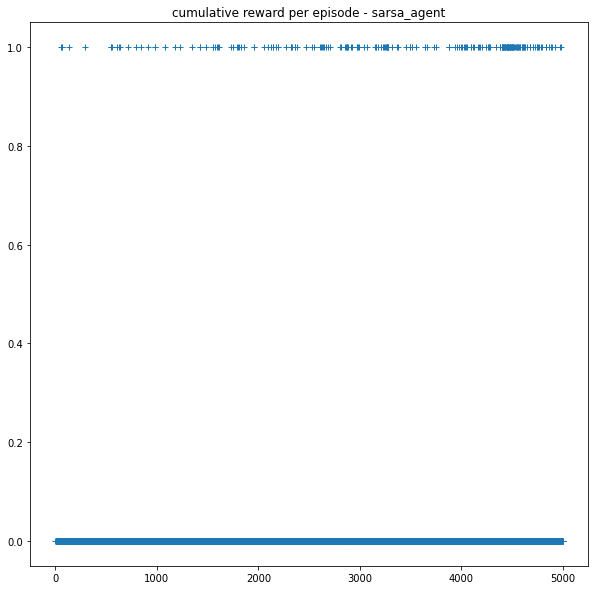

In [ ]:
sarsa_agent = MySarsaAgent(env)
rewards = run_experiment_episode_train(env, sarsa_agent, 5000)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(rewards,'+')
ax.set_title('cumulative reward per episode - sarsa_agent')

In [ ]:
sarsa_agent.policy

array([[0.025, 0.025, 0.025, 0.925],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.925, 0.025, 0.025, 0.025]])

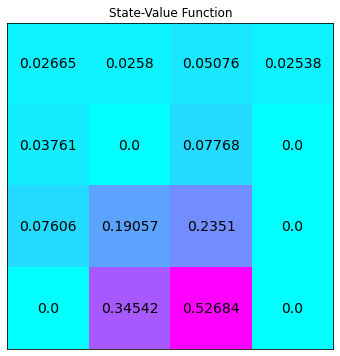

In [ ]:
V = policy_evaluation(env, sarsa_agent.policy)
plot_values_lake(V)

In [ ]:
V.sum()

1.617871829503407

### Q-learning

Q learning is an offpolicy sarsa. Instead of update the Q function with the current policy action, it uses a greedy estimation of the policy action

SARAS $Q(S_t,A_t) \leftarrow Q(S_t,A_t)+ \alpha(R_{t+1}+\gamma Q(S_{t+1},A_{t+1})−Q(S_t,A_t))$

Q-learning $Q(S_t,A_t) \leftarrow Q(S_t,A_t)+ \alpha(R_{t+1}+\gamma \max_a Q(S_{t+1},a)−Q(S_t,A_t))$

### TODO 6): complete Q agent

In [ ]:
#TODO: write Q learning update
class MyQAgent(Agent):
    def __init__(self, env, gamma = .99, epsilon = .1, alpha = .01):
        super().__init__(env, gamma, epsilon)
        self.alpha = alpha
        self.q = np.ones([self.env.observation_space.n, self.env.action_space.n]) / self.env.action_space.n
    def train(self, current_state, action, reward, next_state, done):
        # TRAIN Q
        for state in range(env.observation_space.n):
            self.policy[state] = get_epsilon_greedy_policy(self.q[state], self.epsilon, env.action_space.n)

In [30]:
#Done: write Q learning update
class MyQAgent(Agent):
    def __init__(self, env, gamma = .99, epsilon = .1, alpha = .01):
        super().__init__(env, gamma, epsilon)
        self.alpha = alpha
        self.q = np.ones([self.env.observation_space.n, self.env.action_space.n]) / self.env.action_space.n
    def qsa_update(self, state, action, reward, next_state, done): 
        if done is False:
            target = reward + self.gamma * np.max(self.q[next_state, :])
        else:
            target = reward
        td_error = target - self.q[state, action]
        self.q[state, action]  += self.alpha * td_error
    def train(self, current_state, action, reward, next_state, done):
        self.qsa_update(current_state, action, reward, next_state, done)
        for state in range(env.observation_space.n):
            self.policy[state] = get_epsilon_greedy_policy(self.q[state], self.epsilon, env.action_space.n)

episode: 0 - cum reward 0.0
episode: 1 - cum reward 1.0
episode: 2 - cum reward 0.0
episode: 3 - cum reward 0.0
episode: 4 - cum reward 0.0
episode: 5 - cum reward 0.0
episode: 6 - cum reward 0.0
episode: 7 - cum reward 0.0
episode: 8 - cum reward 0.0
episode: 9 - cum reward 0.0
episode: 10 - cum reward 0.0
episode: 11 - cum reward 0.0
episode: 12 - cum reward 0.0
episode: 13 - cum reward 0.0
episode: 14 - cum reward 0.0
episode: 15 - cum reward 0.0
episode: 16 - cum reward 0.0
episode: 17 - cum reward 0.0
episode: 18 - cum reward 0.0
episode: 19 - cum reward 0.0
episode: 20 - cum reward 1.0
episode: 21 - cum reward 0.0
episode: 22 - cum reward 0.0
episode: 23 - cum reward 0.0
episode: 24 - cum reward 0.0
episode: 25 - cum reward 0.0
episode: 26 - cum reward 0.0
episode: 27 - cum reward 0.0
episode: 28 - cum reward 0.0
episode: 29 - cum reward 0.0
episode: 30 - cum reward 0.0
episode: 31 - cum reward 1.0
episode: 32 - cum reward 1.0
episode: 33 - cum reward 0.0
episode: 34 - cum reward

Text(0.5, 1.0, 'cumulative reward per episode - q_agent')

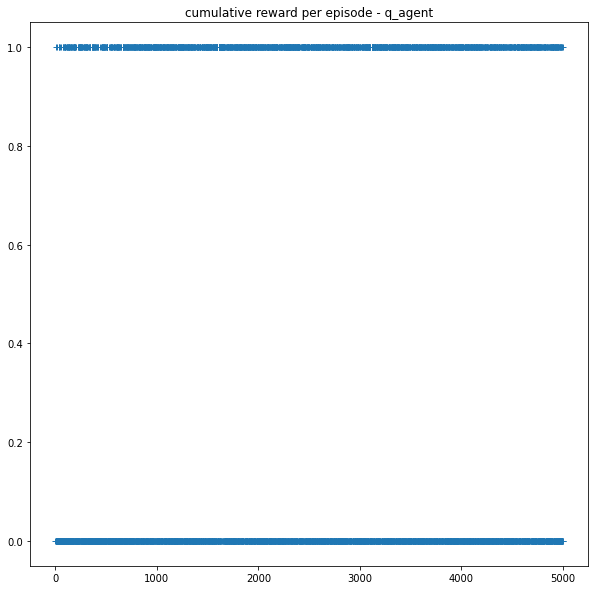

In [31]:
q_agent = MyQAgent(env)
rewards = run_experiment_episode_train(env, q_agent, 5000)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(rewards,'+')
ax.set_title('cumulative reward per episode - q_agent')

In [ ]:
q_agent.policy

array([[0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.025, 0.925],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025]])

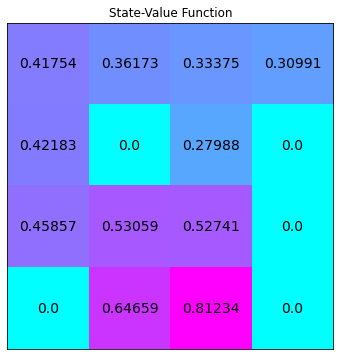

In [32]:
V = policy_evaluation(env, q_agent.policy)
plot_values_lake(V)

In [33]:
V.sum()

5.100116629064201

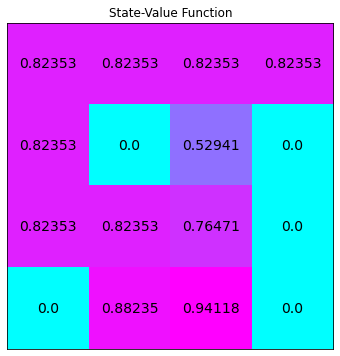

8.882351322605881

In [34]:
policy_best, V_best = value_iteration(env)
plot_values_lake(V_best)
V_best.sum()

# Question: Why we don't have the optimal policy?

In [35]:
q_agent.policy

array([[0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.025, 0.925],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025]])

In [ ]:
#TODO: compute the best policy, using the current one
q_policy_no_eps = np.zeros(q_agent.policy.shape)

In [36]:
#Done:
q_policy_no_eps = np.zeros(q_agent.policy.shape)
q_policy_no_eps[np.arange(len(q_policy_no_eps)), q_agent.policy.argmax(axis=1)] = 1

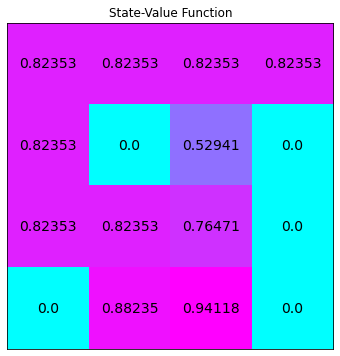

8.882351322605881

In [ ]:
V = policy_evaluation(env, q_policy_no_eps)
plot_values_lake(V)
V_best.sum()

In [ ]:
q_policy_no_eps

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

# Use what you built

# train/test your agent in other discrete action-space env https://gym.openai.com/envs/#toy_text

In [ ]:
env = gym.make('Blackjack-v1')
env = gym.make('Taxi-v3')

In [ ]:
your_agent = 
nb_episode = 10
run_experiment_episode_train(env, your_agent, nb_episode, is_train=False)

### keep in mind:
\begin{aligned}
MDP \rightarrow V(S_t) &\leftarrow \mathbb{E}[R_{t+1} + \gamma V(S_{t+1})] \\
MC \rightarrow V(S_t) &\leftarrow V(S_t) + \alpha (G_t - V(S_{t}))\\
TD \rightarrow V(S_t) &\leftarrow V(S_t) + \alpha (R_{t+1} + \gamma V(S_{t+1}) - V(S_t))
\end{aligned}